In [2]:
import axelrod as axl

from axelrod.random_ import random_choice

C, D = axl.Action.C, axl.Action.D

import time

In [8]:
import pandas as pd

from keras.models import Sequential, load_model

In [9]:
from keras.layers import (
    LSTM,
    Dense,
    Dropout,
    TimeDistributed,
)

In [10]:
import numpy as np
import glob
import matplotlib.pyplot as plt

In [11]:
def read_validation_dataframes(files_location):
    filenames = glob.glob(files_location)
    dfs = []
    for file in filenames:
        df = pd.read_csv(file, index_col=0)
        dfs.append(df)
    df = pd.concat(dfs).reset_index()
    return df

In [12]:
import imp

player_class = imp.load_source("player_class", "player_class.py")

**LSTM model sequence to sequence top twenty**

In [11]:
files_location = "hawk_output/output_lstm_unknown_model_top_twenty/validation_measures_run_*.csv"
df = read_validation_dataframes(files_location)

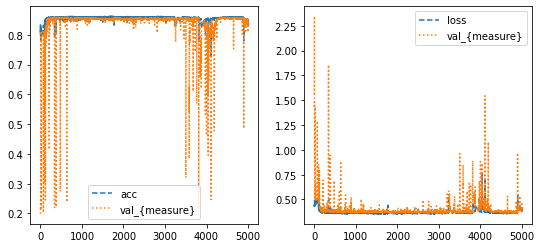

In [12]:
fig, ax = plt.subplots(ncols=2, figsize=(9, 4))

for i, measure in enumerate(['acc', 'loss']):
    ax[i].plot(df[measure], '--', label=measure);
    ax[i].plot(df[f'val_{measure}'], ':', label='val_{measure}');
    ax[i].legend();

**The player**



The model needs to read in by recreating the model because it was trained on hawk and on gpu

In [13]:
num_hidden_cells = 100
drop_out_rate = 0.2

In [15]:
model = player_class.read_model_classification("hawk_output/output_unknown_lstm_top_twenty/weights-over-time.h5")

**Stochastic version against basic strategies**

In [17]:
model.predict(player_class.reshape_history_lstm_model([0, 1, 1]))

array([[0.92850095]], dtype=float32)

In [18]:
player = player_class.LSTMPlayer(model, player_class.reshape_history_lstm_model)

In [21]:
strategies_tournament = [s() for s in axl.basic_strategies] + [player]

In [25]:
tournament = axl.Tournament(players=strategies_tournament, turns=205, repetitions=10)

In [26]:
results = tournament.play(progress_bar=False)

//anaconda3/envs/rnn/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


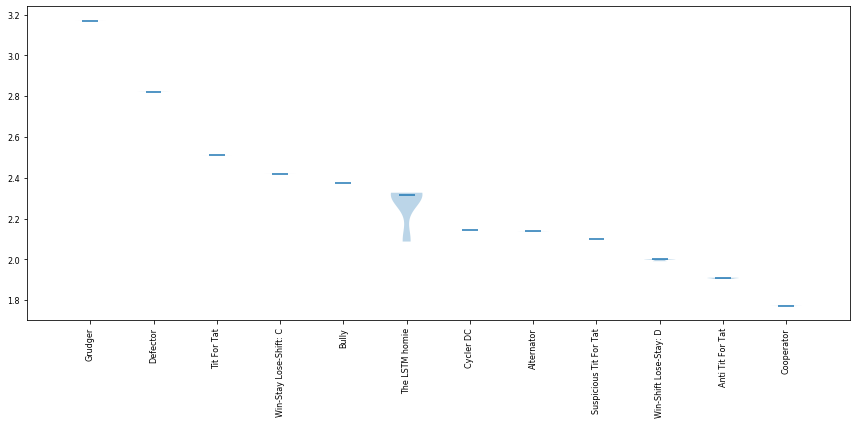

In [27]:
plot = axl.Plot(results)
p = plot.boxplot()
p.show()

**Non stochastic version**

In [28]:
player = player_class.LSTMPlayer(model, player_class.reshape_history_lstm_model, opening_probability=0)

In [29]:
strategies_tournament = [s() for s in axl.basic_strategies] + [player]

In [30]:
tournament = axl.Tournament(players=strategies_tournament, turns=205, repetitions=10)

In [31]:
results = tournament.play(progress_bar=False)

//anaconda3/envs/rnn/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


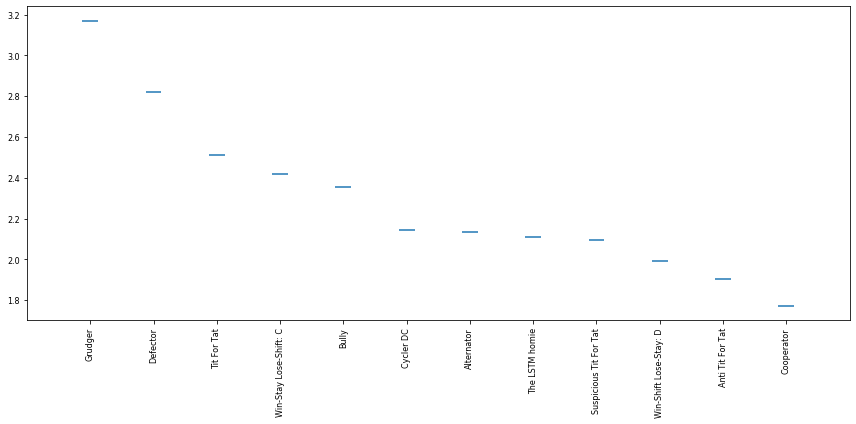

In [32]:
plot = axl.Plot(results)
p = plot.boxplot()
p.show()

In [33]:
player = player_class.LSTMPlayer(model, player_class.reshape_history_lstm_model, opening_probability=1)

In [34]:
strategies_tournament = [s() for s in axl.basic_strategies] + [player]
tournament = axl.Tournament(players=strategies_tournament, turns=205, repetitions=10)
results = tournament.play(progress_bar=False)

//anaconda3/envs/rnn/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


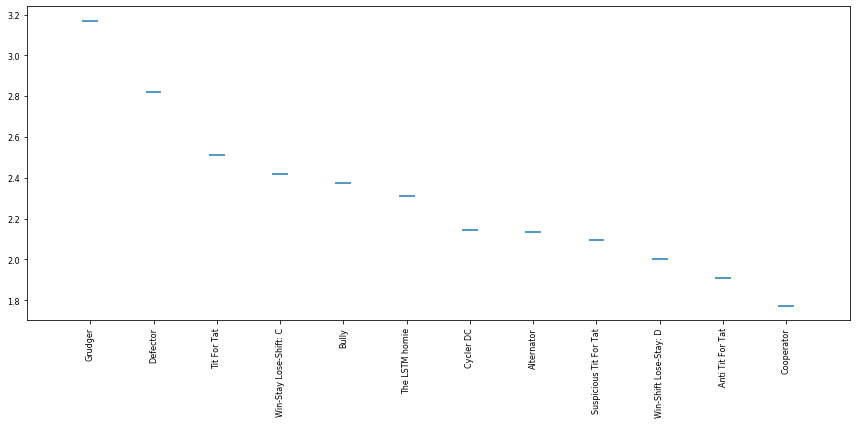

In [35]:
plot = axl.Plot(results)
p = plot.boxplot()
p.show()

**LSTM model sequence to sequence all**

In [37]:
files_location = "hawk_output/output_lstm_unknown_model/validation_measures_run_*.csv"
df = read_validation_dataframes(files_location)

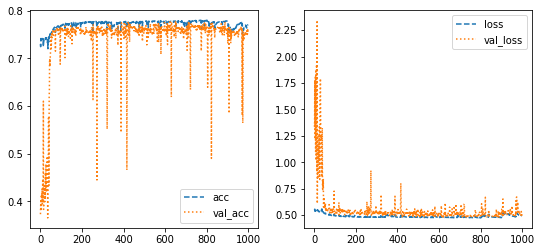

In [52]:
fig, ax = plt.subplots(ncols=2, figsize=(9, 4))

for i, measure in enumerate(['acc', 'loss']):
    ax[i].plot(df[measure], '--', label=measure);
    ax[i].plot(df[f'val_{measure}'], ':', label=f'val_{measure}');
    ax[i].legend();

In [39]:
model = player_class.read_model_classification("hawk_output/output_lstm_unknown_model/weights-over-time.h5")

**Stochastic version**

In [43]:
player = player_class.LSTMPlayer(model, player_class.reshape_history_lstm_model)

In [44]:
strategies_tournament = [s() for s in axl.basic_strategies] + [player]
tournament = axl.Tournament(players=strategies_tournament, turns=205, repetitions=10)
results = tournament.play(progress_bar=False)

//anaconda3/envs/rnn/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


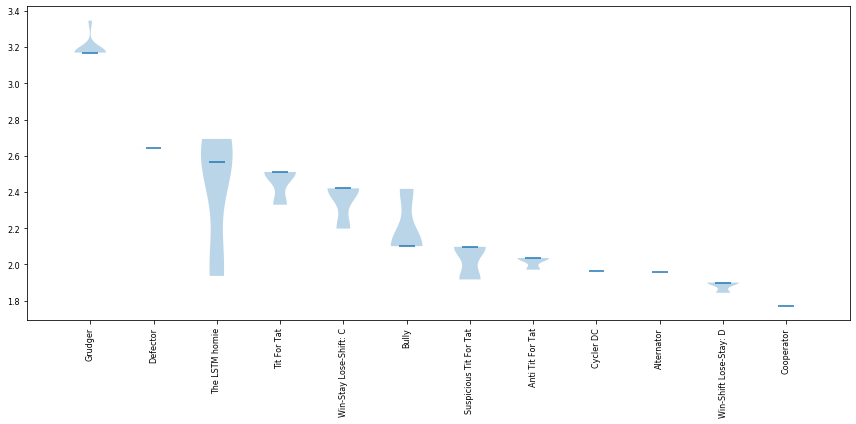

In [45]:
plot = axl.Plot(results)
p = plot.boxplot()
p.show()

**non stochastic**

In [46]:
player = player_class.LSTMPlayer(model, player_class.reshape_history_lstm_model, opening_probability=1)

In [47]:
strategies_tournament = [s() for s in axl.basic_strategies] + [player]
tournament = axl.Tournament(players=strategies_tournament, turns=205, repetitions=10)
results = tournament.play(progress_bar=False)

//anaconda3/envs/rnn/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


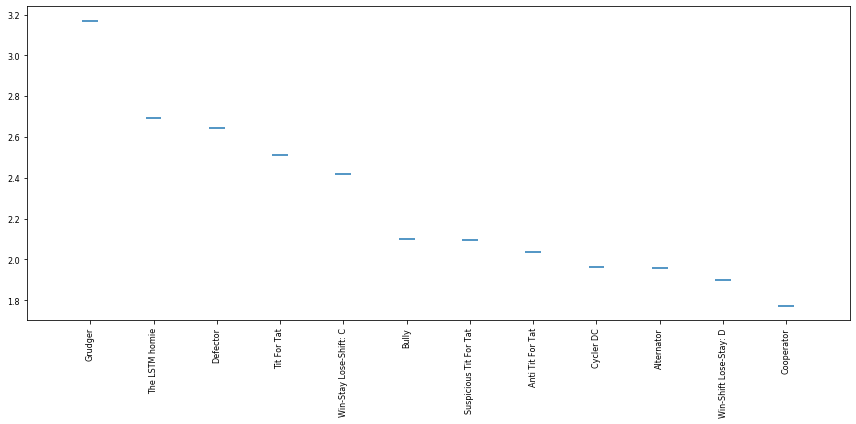

In [48]:
plot = axl.Plot(results)
p = plot.boxplot()
p.show()

In [49]:
player = player_class.LSTMPlayer(model, player_class.reshape_history_lstm_model, opening_probability=0)

In [50]:
strategies_tournament = [s() for s in axl.basic_strategies] + [player]
tournament = axl.Tournament(players=strategies_tournament, turns=205, repetitions=10)
results = tournament.play(progress_bar=False)

//anaconda3/envs/rnn/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


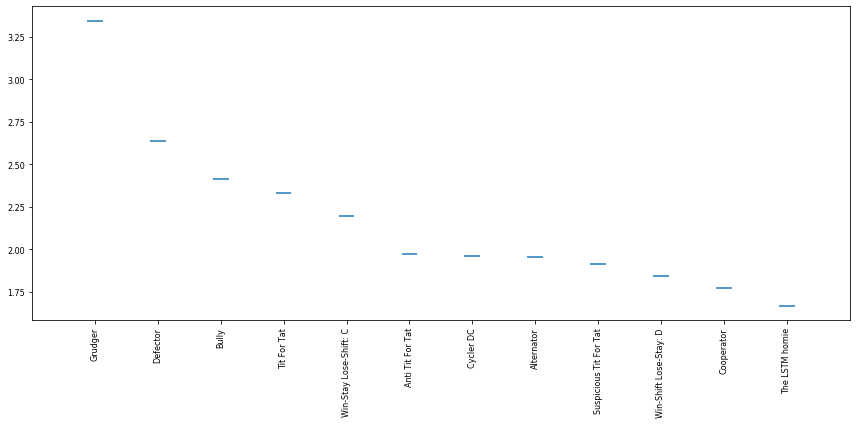

In [51]:
plot = axl.Plot(results)
p = plot.boxplot()
p.show()

**LSTM model sequence to sequence basic**

In [13]:
files_location = "hawk_output/output_lstm_unknown_model_basic/validation_measures_run_*.csv"
df = read_validation_dataframes(files_location)

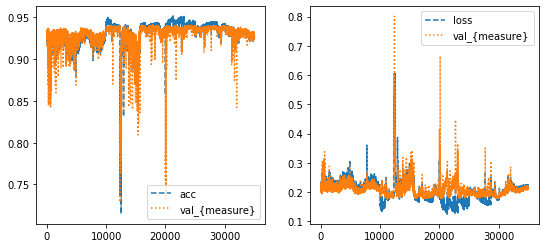

In [14]:
fig, ax = plt.subplots(ncols=2, figsize=(9, 4))

for i, measure in enumerate(['acc', 'loss']):
    ax[i].plot(df[measure], '--', label=measure);
    ax[i].plot(df[f'val_{measure}'], ':', label='val_{measure}');
    ax[i].legend();

In [16]:
model = player_class.read_model_classification("hawk_output/output_lstm_unknown_model_basic/weights-over-time.h5")

In [17]:
player = player_class.LSTMPlayer(model, player_class.reshape_history_lstm_model)

In [21]:
strategies_tournament = [s() for s in axl.basic_strategies] + [player]
tournament = axl.Tournament(players=strategies_tournament, turns=200, repetitions=5)
results = tournament.play(progress_bar=False)

//anaconda3/envs/rnn/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


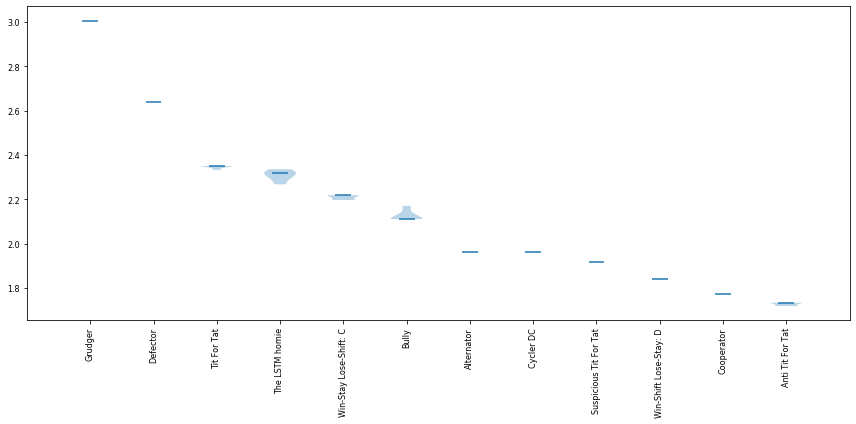

In [22]:
plot = axl.Plot(results)
p = plot.boxplot()
p.show()

**Non stochastic**

In [58]:
player = player_class.LSTMPlayer(model, player_class.reshape_history_lstm_model, opening_probability=1)

In [59]:
strategies_tournament = [s() for s in axl.basic_strategies] + [player]
tournament = axl.Tournament(players=strategies_tournament, turns=205, repetitions=10)
results = tournament.play(progress_bar=False)

//anaconda3/envs/rnn/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


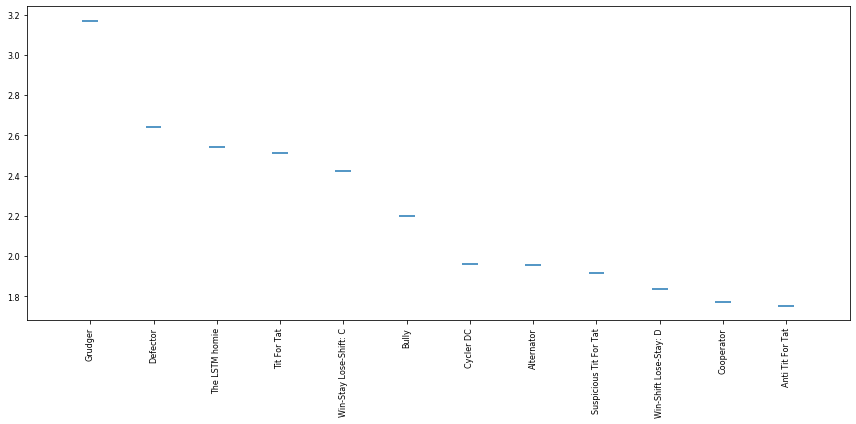

In [60]:
plot = axl.Plot(results)
p = plot.boxplot()
p.show()

In [61]:
player = player_class.LSTMPlayer(model, player_class.reshape_history_lstm_model, opening_probability=0)

In [62]:
strategies_tournament = [s() for s in axl.basic_strategies] + [player]
tournament = axl.Tournament(players=strategies_tournament, turns=205,
                            repetitions=10)
results = tournament.play(progress_bar=False)

//anaconda3/envs/rnn/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


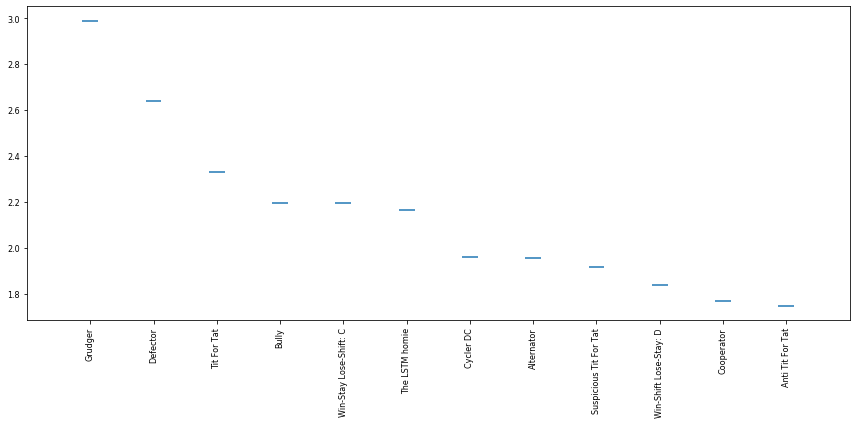

In [63]:
plot = axl.Plot(results)
p = plot.boxplot()
p.show()